# K-Nearest Neighbors
___

See the model implementation [here](https://github.com/auhide/ml-basics-pytorch/blob/main/algos/basic/knn.py).

## 1. Libraries

In [1]:
import os
import sys


# Adding the path to the algorithms modules
ROOT_PATH = os.path.join("..", "..", "algos", "basic")
sys.path.append(ROOT_PATH)

import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from knn import KNearestNeighborsClassifier

## 2. Dataset

### 2.1. Generating the dataset

In [12]:
# Creating a mock dataset.
X, y = make_blobs(
    n_samples=150, centers=[(-2, -2), (0, 0)], cluster_std=0.8
)

# Setting all 0s to -1s, since that's expected by the binary SVM algorithm.
y[y == 0] = -1

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (150, 2)
y shape: (150,)


### 2.2. Plotting the dataset

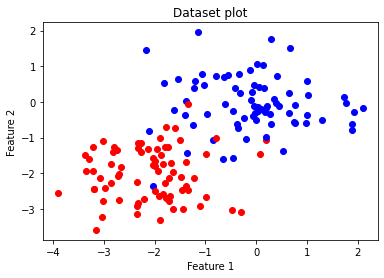

In [13]:
def plot_dataset(X, y, colors={-1: "red", 1: "blue"}, title="Dataset"):
    # Plot the two classes
    for i in range(len(y)):
        plt.scatter(X[i, 0], X[i, 1], color=colors[y[i]])

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")


plot_dataset(X, y, title="Dataset plot")
plt.show()

## 3. Training and evaluation

### 3.1. K-Nearest Neighbors algorithm
In comparison to most ML algorithms, *KNN* doesn't have weights. It uses the training data directly and predicts based on it.
As usual, let's define the inputs and outputs. The model expects a *feature matrix* $X \in \mathbb{R}^{m \times n}$ and a *targets vector* $y \in \mathbb{R}^m$ (in our implementation the shape is actually $\mathbb{R}^{m \times 1}$).

Each row vector in $X$ can be defined as
$$ 
\textbf{x}_i = \left[ {\begin{array}{cc}
        x_{1} & \dots & x_{n}
    \end{array} } 
\right] 
$$
where $i \in \left[ 1, m \right]$. If we want to predict the class of an input vector of features $\textbf{x}_{in}$ , we compare the input vector to each $\textbf{x}_i$ using Euclidean/Manhattan distance as a metric. Then, the top $k$ smallest distances are selected and based on them the class of $\textbf{x}_{in}$ is predicted. 

Therefore, for each $\textbf{x}_i$ we do this:
$$ \textbf{x}_{distances} = \left[ {\begin{array}{cc}
      || \textbf{x}_{in} - \textbf{x}_1 || \\
      \vdots \\
      || \textbf{x}_{in} - \textbf{x}_n || \\
    \end{array} } 
  \right] 
$$
and then get the indices of the top $k$ smallest values (top $k$ closest feature vectors in the training subset). 
Here $||.||$ may be either *Euclidean* or *Manhattan* distance.

Based on these indices, we take their respective classes from $y$ and construct the vector $\textbf{y}_{topk}$
$$ \textbf{y}_{topk} = \left[ {\begin{array}{cc}
      y_1 \\
      \vdots \\
      y_k \\
    \end{array} } 
  \right] 
$$
Afterwards, we get the $mode$ of $\textbf{y}_{topk}$, which leaves us with the predicted class (the one that has occurred the most in $\textbf{y}_{topk}$).

In our implementation this may happen $l$ times, where $l$ is the number of $\textbf{x}_{in}$ vectors, since there might be many predictions to be made. 

In [17]:
X, y = torch.Tensor(X), torch.Tensor(y).unsqueeze(-1)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, 
    test_size=0.1, random_state=42
)

print("Fitting model to the dataset...")
knn = KNearestNeighborsClassifier(k=5, metric="l2")
train_accuracy = knn.fit(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.2f}")

Fitting model to the dataset...
Training accuracy: 0.94


### 3.2. Model Evaluation

In [18]:
eval_accuracy = knn.evaluate(X_valid, y_valid)
print(eval_accuracy)

1.0


[]

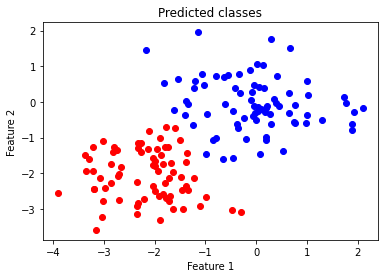

In [21]:
y_pred = knn.predict(X).squeeze(-1).detach().numpy()

plot_dataset(X, y_pred.round(), title="Predicted classes")
plt.plot()

As we can see, the model can't predict the outliers of each class, since they are somewhat intertwined with each other.
Nevertheless, most of the datapoints are correctly predicted.